In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/WOC_6.0/Polynomial_Regression/Polynomialdata_train.csv')
df

,target,feature 1,feature 2,feature 3
0,4.131528e+06,5.221849,7.295111,95.716846
1,3.172975e-01,-5.106284,4.220085,-6.172360
2,4.676422e+04,-4.218053,-7.573823,-39.493884
3,1.404175e+05,-18.439122,-2.275148,-40.885857
4,4.788988e+03,13.353046,3.103837,18.622367
...,...,...,...,...
49995,1.853922e+04,-25.309264,-6.094516,75.361431
49996,6.379917e+03,-58.016982,-6.064214,27.146387
49997,3.835601e+06,29.857894,1.422973,75.620505
49998,2.580318e+04,10.793146,1.215972,34.437761


In [ ]:
a = df.shape[0]-4000
x_train=np.array(df.iloc[0:a,1:])
y_train=np.array(df.iloc[0:a,0:1])
x_val=np.array(df.iloc[a:,1:])
y_val=np.array(df.iloc[a:,0:1])
x_train.shape,y_train.shape

((46000, 3), (46000, 1))

Text(0.5, 0, 'Feature value')

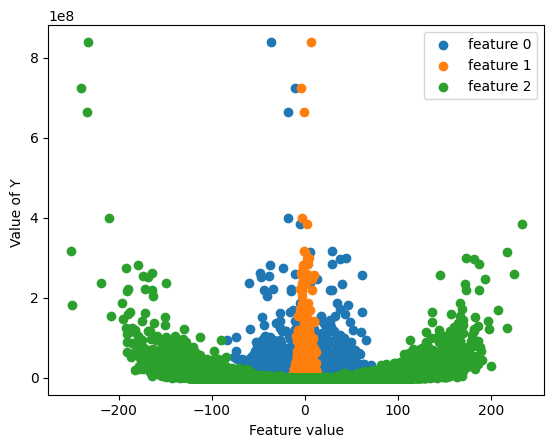

In [26]:
for i in range(3):
  plt.scatter(x_train.T[i],y_train,label= f"feature {i}")
plt.legend()
plt.ylabel("Value of Y ")
plt.xlabel("Feature value")

In [ ]:
class Polynomial_Regression:
  def __init__(self, X, Y, learning_rate, iterations=1000,degree=1, lambda_regularization=0.1, normalization=True):
    self.b = 0
    self.degree = degree
    self.lambda_reg = lambda_regularization
    self.norm = normalization
    self.J_history = []
    self.Train(X, Y, learning_rate, iterations)

  def Feature_engineering(self,X):
    for n in range(2,self.degree+1):
      for i in range(self.degree+1):
        for j in range(self.degree+1):
          if i+j<=n:
            X = np.append(X ,(X[:,0]**i * X[:,1]**j * X[:,2]**(n-i-j)).reshape(-1,1) ,axis = 1)
    self.w = np.zeros((X.shape[1], 1))
    return X

  def Normalization(self, X):
    self.mu = np.mean(X,axis=0)
    self.sigma = np.std(X,axis=0)
    if self.norm:
        X1 = (X - self.mu) / self.sigma
    else:
        X1 = X
    return X1

  def Gradient(self, X1, Y):
    m, n = X1.shape
    dj_dw = np.zeros((1, n))
    dj_db = 0
    error = np.dot(X1, self.w) + self.b - Y
    dj_dw = (np.dot((np.dot(X1, self.w) + self.b - Y).T, X1) + self.lambda_reg * self.w.T) / m
    dj_dw = dj_dw.T
    dj_db = np.sum(np.dot(X1, self.w) + self.b - Y) / m
    return dj_dw, dj_db

  def Gradient_descent(self, X1, Y, learning_rate, iterations):
    for i in range(iterations):
      dj_dw, dj_db = self.Gradient(X1, Y)
      self.b -= learning_rate * dj_db
      self.w -= learning_rate * dj_dw
      if i % math.ceil((iterations) / 10) == 0:
        self.J_history.append([self.Cost_function(X1, Y),i])
        print(f"Iteration {i:5}: Cost {self.J_history[-1][0]}")
    self.J_history.append([self.Cost_function(X1, Y),iterations])
    print(f"Iteration {iterations:5}: Cost {self.J_history[-1][0]}")
    return  self.w , np.array(self.J_history)

  def Cost_function(self, X1, Y):
    error = np.dot(X1, self.w) + self.b - Y
    error = error.reshape(1, -1)
    m = X1.shape[0]
    regularization_term = self.lambda_reg * np.sum(self.w**2)
    cost = (np.sum(error * error) + regularization_term) / (2 * m)
    return cost

  def Train(self, X, Y, learning_rate, iterations):
    X1 = self.Feature_engineering(X)
    X1 = self.Normalization(X1)
    self.w1 , self.J_history =self.Gradient_descent(X1, Y, learning_rate, iterations)

    '''
    self.w1 is used as when we use evaluate, the feature_engineering fuction called in it to transform the new dataset resets the self.w to np.zero array
    self.J_history also gets updated from a list to numpy array in above line
    '''
    self.Plot_cost()

  def evaluate(self, X_test_data):
    X_test_data = self.Feature_engineering(X_test_data)
    if self.norm:
      X_test_data_norm = (X_test_data - self.mu) / self.sigma
    else:
      X_test_data_norm = X_test_data

    Y = (np.dot(X_test_data_norm, self.w1)+self.b)
    return Y

  def r2_score(self, X_test,Y_test):
    Y_pred = self.evaluate(X_test)
    print("R2 score: ", end="")
    return (1 - (np.sum((Y_test - Y_pred)**2)) / (np.sum((Y_test - np.mean(Y_test))**2)))

  def Plot_cost(self):
    plt.plot(self.J_history[0:,1].reshape(-1,1),self.J_history[0:,0].reshape(-1,1))
    plt.ylabel("Cost")
    plt.xlabel("Iterations")

Iteration     0: Cost 18543301505081.863
Iteration  1000: Cost 1208991876.4845967
Iteration  2000: Cost 11945563.367514547
Iteration  3000: Cost 145550.52364386152
Iteration  4000: Cost 2361.379123273312
Iteration  5000: Cost 49.07643388480625
Iteration  6000: Cost 1.173008169004374
Iteration  7000: Cost 0.029809191093481728
Iteration  8000: Cost 0.0007764930583843936
Iteration  9000: Cost 2.0433891649514523e-05
Iteration 10000: Cost 5.421293306320952e-07


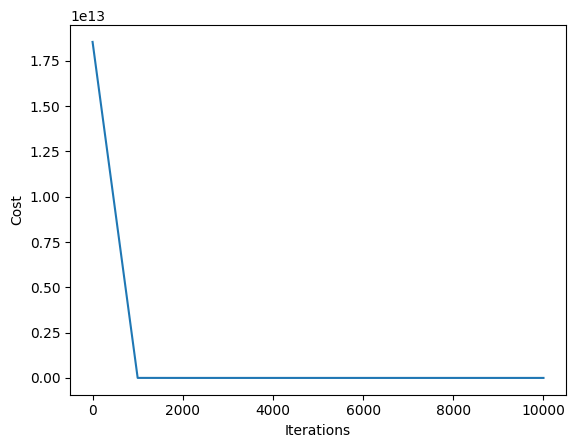

In [ ]:
model = Polynomial_Regression(x_train,y_train,0.2,10000,6,lambda_regularization=0,normalization=True)

In [25]:
print(model.r2_score(x_train , y_train))

R2 score: 1.0


In [ ]:
print(model.r2_score(x_val,y_val))

R2 score: 1.0


In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/WOC_6.0/Polynomial_Regression/Polynomialdata_test.csv')
df1

,ID,feature 1,feature 2,feature 3
0,16588,36.247643,-2.372704,43.835947
1,17513,5.903779,5.460086,-96.149414
2,14448,-37.298157,6.869786,-14.084487
3,13972,-40.080077,2.395066,-43.432941
4,18321,-20.417799,-2.194459,5.737226
...,...,...,...,...
9995,19691,-13.571554,2.931176,76.902716
9996,10512,-2.015904,-2.827700,4.999604
9997,17741,47.095192,-1.977461,39.044902
9998,18381,-1.808178,-0.693782,57.918628


In [27]:
x_test=np.array(df1.iloc[:,1:])
id = np.array(df1.iloc[:,0])

In [28]:
x_test.shape , id.shape

((10000, 3), (10000,))

In [29]:
y_test=model.evaluate(x_test).reshape(-1)
y_test.shape

(10000,)

In [ ]:
submission = pd.DataFrame({"Id":id , "Output":y_test})
submission

,Id,Output
0,16588,566024.052956
1,17513,954693.466255
2,14448,19975.650887
3,13972,732186.076964
4,18321,58.566670
...,...,...
9995,19691,217537.380485
9996,10512,0.001263
9997,17741,913425.784796
9998,18381,74434.821939


In [ ]:
submission.to_csv("/content/drive/MyDrive/WOC_6.0/Polynomial_Regression/Submission_poly.csv")